## Randomness and Plotting Lecture/Lab 3

-----------

This material is based in part on previous CS108L, see https://cs4all.cs.unm.edu/cs108.html
- Credit to Prof. Melanie Moses, Dr. Irene Lee, Dr. Maureen Psaila-Dombrowski, Prof. Dave Ackley and collaborators (see website)

### Learning Goals

1. Review
    - Pseudo-random numbers
        - Importance of randomness in computing
        - Generate with linear congruential generator
    
    - Adding elements to a list with append

    - Approximating Pi with random numbers         
    
    - Plotting with pandas (lines and scatter)

2. New: Plot point clouds (scatter plot) of your random points

3. New: Analyze and interpret your evidence
   - Plot the number of random numbers (N) on the x-axis
   - Plot the approximation to Py on the y-axis
   - What happens as N gets larger?
   
4. New: Automate, do the above for many values of N, inside a loop
    

### Review: Randomness in computing is very important
    - Used to approximate important values (like Pi)
    - Used in computational simulations (like agent based modeling)
    - Used to randomly sample data (like with K-means)
    -....

### But, computers are not random, and instead use a determinisitic (predictable) process to produce numbers that look random (but actually aren't truly random).  
    - Gives rise to pseudo-random numbers
    
### We use a linear congruential generator for pseudo-random numbers

### Remember how to append to a list

In [1]:
def my_function(x):
    return 5*x

my_list = []

for i in range(10):
    new_number = my_function(i)
    my_list.append(new_number)
    
print(my_list)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


### Remember basic plotting

1. Consider the below example where we plot a list of N values on the x-axis, versus Pi approximations on the y-axis
    - N represents how many random numbers were used to compute Pi
    
2. In the cell below, consider the example where we plot random x and y values and the unit circle


In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

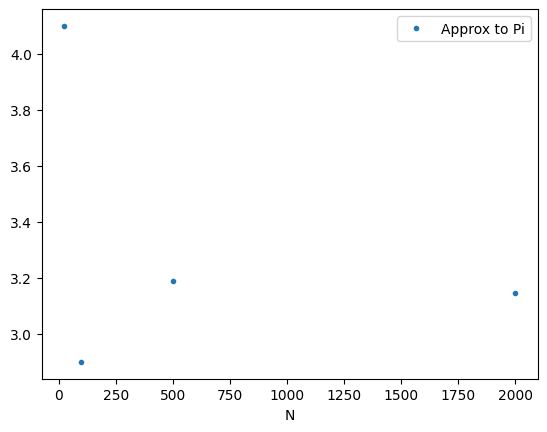

In [3]:
# Plot N versus Pi Approximations

N = [25, 100, 500, 2000]
Pi_approximations = [4.1, 2.9, 3.19, 3.146]

df = pd.DataFrame({'N': N, 'Approx to Pi': Pi_approximations})
ax = df.plot(x='N', y='Approx to Pi', style = ['.'])


### We now introduce more sophisticated scatter plotting of points

(-1.1, 1.1, -1.1, 1.1)

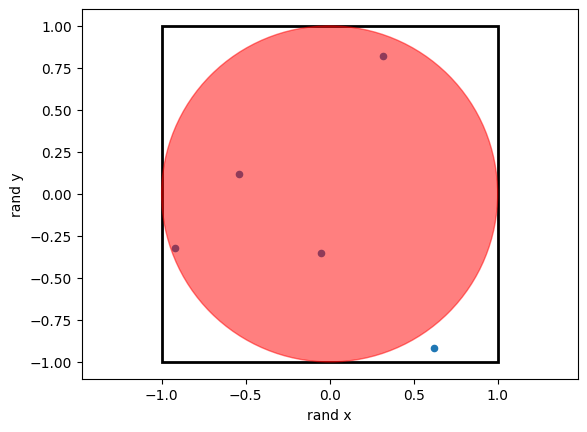

In [4]:
# Scatter plot random points

# random points
datax = [-0.54, 0.32, -0.05, -0.92, 0.62]
datay = [0.12,  0.82, -0.35, -0.32, -0.92]
df = pd.DataFrame({'rand x': datax, 'rand y': datay})


# create circle and rectangle objects
circle = plt.Circle((0,0), 1.0, alpha=0.5, color='r')
rectangle = plt.Rectangle((-1,-1), 2, 2, linewidth=2, edgecolor='k', facecolor='None')

# scatter plot x and y
ax = df.plot.scatter(x='rand x', y='rand y')

# add the rectangle and circle
ax.add_patch(rectangle)
ax.add_patch(circle)
ax.axis('equal')


### Approximating Pi with random data

The area of the unit circle with radius 1 is $\pi r^2 = \pi 1^2 = \pi$

The area of the square is $2 \times 2 = 4$ (width times height)


<img src="https://raw.githubusercontent.com/jbschroder/CS108/main/lecture_images/Pi_approx.png" width="350">

The ratio of these two areas is 
$$ \frac{\mbox{area of circle}}{\mbox{area of square}} = \frac{\pi}{4}$$
which lets us approximate Pi with random points through
$$ \frac{\mbox{points inside circle}}{\mbox{points inside square}} = \frac{\pi}{4}$$

This is a limit value, that is, in the limit, as we take more and more random numbers, this ratio approaches $\pi/4$

### This yields an algorithm for approximating Pi

        N = something large
        num_inside = 0
        
        for loop with N iterations
        
            generate rand_point inside the square 
            
            get x and y from the rand_point

            if x**2 + y**2 is less than 1:
                increase num_inside by 1
                                  
        pi = 4*( num_inside / N)
        print(pi, ":  approximation to pi")

### Lab Tasks

### We first have to do a little housecleaning, and import our packages for plotting and data manipulation
1. Matplotlib is the bottom-level plotting, and we need to tell Matplotlib to inline plots below notebook cells
2. Pandas is for data manipulation, storage, and plotting

In [5]:
%matplotlib inline
import pandas as pd

### Tasks: Create code cells below to accomplish the following tasks

1. Take your loop from Wednesday that generates pseudo-random points and approximates Pi

2. In three separate cells, repeat your experiment for approximating Pi using N = 10, N = 100, and N = 500
    - Make sure to output your approximation to Pi for each N value

3. Also for each N value, output the mean of your random numbers

        print(df['data x'].mean())
        print(df['data y'].mean())

4. Also for each N value, add code to scatter plot your pseudo-random points, also drawing the square and unit circle    

In [6]:
N = 10
a = 8269
m = 2**31 - 1

def pseudorand(x):
    a = 8269
    m = 2**31 - 1
    xnew = (a*x)%m
    return xnew

current_rand = 3
datax = []
datay = []
num_inside = 0

for i in range(N):
    current_rand = pseudorand(current_rand)
    x = 2*current_rand/(2**31-1) - 1
    datax.append(x)

    current_rand = pseudorand(current_rand)
    y = 2*current_rand/(2**31-1) - 1
    datay.append(y)
    if x**2 + y**2 < 1:
        num_inside = num_inside + 1


df = pd.DataFrame({'rand x': datax, 'rand y': datay})

print("Mean x value:", df['rand x'].mean())
print("Mean y value:", df['rand y'].mean())
print("")

num_outside = N
pi = 4*(num_inside/num_outside)
print(pi, "approx to pi")

Mean x value: -0.06067351683074305
Mean y value: -0.3093106734144085

2.0 approx to pi


(-1.1, 1.1, -1.1, 1.1)

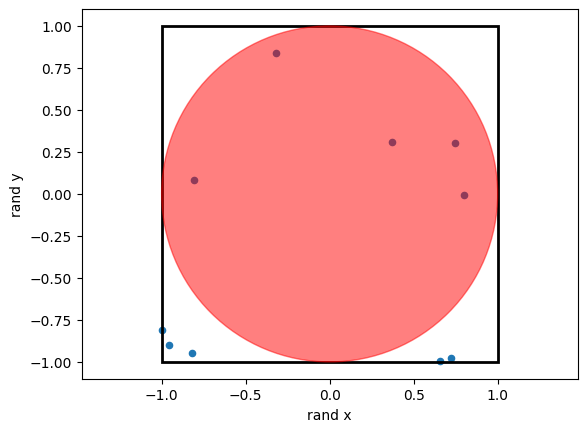

In [7]:
from matplotlib import pyplot as plt

circle = plt.Circle((0,0), 1.0, alpha=0.5, color='r')
rectangle = plt.Rectangle((-1,-1), 2, 2, linewidth=2, edgecolor='k', facecolor='None')

ax = df.plot.scatter(x='rand x', y='rand y')
ax.add_patch(rectangle)
ax.add_patch(circle)

ax.axis('equal')

In [8]:
N = 100
a = 8269
m = 2**31 - 1

def pseudorand(x):
    a = 8269
    m = 2**31 - 1
    xnew = (a*x)%m
    return xnew

current_rand = 3
datax = []
datay = []
num_inside = 0

for i in range(N):
    current_rand = pseudorand(current_rand)
    x = 2*current_rand/(2**31-1) - 1
    datax.append(x)

    current_rand = pseudorand(current_rand)
    y = 2*current_rand/(2**31-1) - 1
    datay.append(y)
    if x**2 + y**2 < 1:
        num_inside = num_inside + 1


df = pd.DataFrame({'rand x': datax, 'rand y': datay})

print("Mean x value:", df['rand x'].mean())
print("Mean y value:", df['rand y'].mean())
print("")

num_outside = N
pi = 4*(num_inside/num_outside)
print(pi, "approx to pi")

Mean x value: -0.019185392595448235
Mean y value: -0.044011371761565735

3.2 approx to pi


(-1.1, 1.1, -1.1, 1.1)

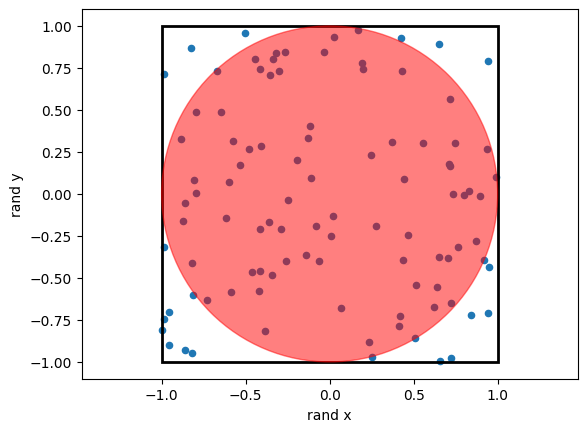

In [9]:
from matplotlib import pyplot as plt

circle = plt.Circle((0,0), 1.0, alpha=0.5, color='r')
rectangle = plt.Rectangle((-1,-1), 2, 2, linewidth=2, edgecolor='k', facecolor='None')

ax = df.plot.scatter(x='rand x', y='rand y')
ax.add_patch(rectangle)
ax.add_patch(circle)

ax.axis('equal')

In [10]:
N = 500
a = 8269
m = 2**31 - 1

def pseudorand(x):
    a = 8269
    m = 2**31 - 1
    xnew = (a*x)%m
    return xnew

current_rand = 3
datax = []
datay = []
num_inside = 0

for i in range(N):
    current_rand = pseudorand(current_rand)
    x = 2*current_rand/(2**31-1) - 1
    datax.append(x)

    current_rand = pseudorand(current_rand)
    y = 2*current_rand/(2**31-1) - 1
    datay.append(y)
    if x**2 + y**2 < 1:
        num_inside = num_inside + 1


df = pd.DataFrame({'rand x': datax, 'rand y': datay})

print("Mean x value:", df['rand x'].mean())
print("Mean y value:", df['rand y'].mean())
print("")

num_outside = N
pi = 4*(num_inside/num_outside)
print(pi, "approx to pi")

Mean x value: 0.013722481188235096
Mean y value: -0.024803054483981356

3.176 approx to pi


(-1.1, 1.1, -1.1, 1.1)

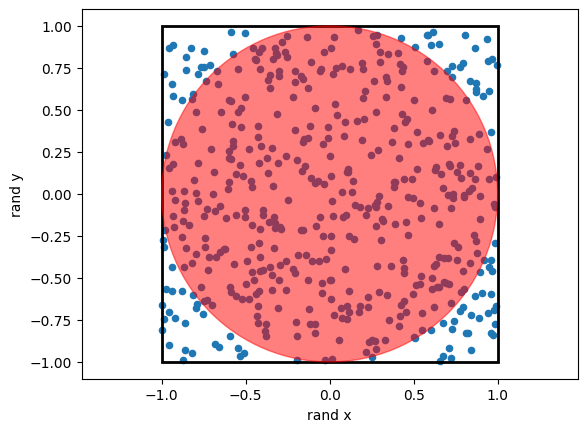

In [11]:
from matplotlib import pyplot as plt

circle = plt.Circle((0,0), 1.0, alpha=0.5, color='r')
rectangle = plt.Rectangle((-1,-1), 2, 2, linewidth=2, edgecolor='k', facecolor='None')

ax = df.plot.scatter(x='rand x', y='rand y')
ax.add_patch(rectangle)
ax.add_patch(circle)

ax.axis('equal')

5. Create a loop over various N values to compute
        
        for N in [10, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]:
            ...compute approximation to Pi...
            ...store approximation to Pi in a list...
            
6. Plot N on on the x-axis and your approximation to Pi on the y-axis

7. In the below box add 125 words of discussion about your plot.
   - Approach this as collecting evidence (computing approximations to Pi)
   - Evaluating evidence (how close am I to Pi with a certain N value?)
   - Draw conclusions
   
     What happens if you change the starting value for your pseudo-random numbers?

In [12]:
a = 8269
m = 2**31 - 1

def pseudorand(x):
    a = 8269
    m = 2**31 - 1
    xnew = (a*x)%m
    return xnew

pi_values = []

for N in [10, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]:

    current_rand = 3
    datax = []
    datay = []
    num_inside = 0

    for i in range(N):
        current_rand = pseudorand(current_rand)
        x = 2*current_rand/(2**31-1) - 1
        datax.append(x)

        current_rand = pseudorand(current_rand)
        y = 2*current_rand/(2**31-1) - 1
        datay.append(y)
        if x**2 + y**2 < 1:
            num_inside = num_inside + 1
        
        
    df = pd.DataFrame({'rand x': datax, 'rand y': datay})

    print("Mean x value:", df['rand x'].mean())
    print("Mean y value:", df['rand y'].mean())
    num_outside = N
    pi = 4*(num_inside/num_outside)
    print(pi, "approx to pi")
    pi_values.append(pi)
    print("")
    

Mean x value: -0.06067351683074305
Mean y value: -0.3093106734144085
2.0 approx to pi

Mean x value: -0.019185392595448235
Mean y value: -0.044011371761565735
3.2 approx to pi

Mean x value: 0.013722481188235096
Mean y value: -0.024803054483981356
3.176 approx to pi

Mean x value: 0.010779202326563745
Mean y value: -0.012775961644377538
3.084 approx to pi

Mean x value: 0.009861486157896688
Mean y value: -0.0085709603522769
3.1296 approx to pi

Mean x value: 0.005701065308554594
Mean y value: -0.0024909635620615268
3.1364 approx to pi

Mean x value: 0.0025370531705660062
Mean y value: 0.002772667410305081
3.1428 approx to pi

Mean x value: 0.0013101409668056956
Mean y value: -4.434548370742426e-05
3.14588 approx to pi

Mean x value: -0.00030207830742098293
Mean y value: -0.00011352406410943882
3.146704 approx to pi

Mean x value: -0.0007004563648935669
Mean y value: -0.00018568130490541506
3.143068 approx to pi



<AxesSubplot: xlabel='N'>

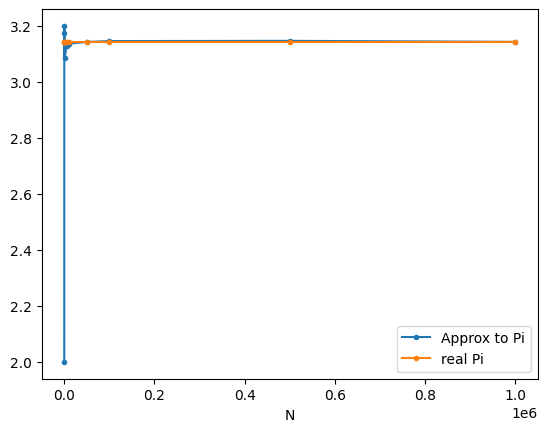

In [14]:
# Plot N versus Pi

N = [10, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]

df = pd.DataFrame({'N': N, 'Approx to Pi': pi_values})
ax = df.plot(x='N', y='Approx to Pi', style = ['.-'])

# not required: plot a line at 3.14159 to show where the real Pi is
df['real Pi'] = [ 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159, 3.14159]
df.plot(x='N', y='real Pi', style = ['.-'], ax=ax)


### Insert Homework discussion here

Your discussion should include some information on the following:
1. Describe how you collected evidence: describe how you used pseudo-random points in the box to approximate Pi

2.  How did you evaluate the evidence: describe how you computed Pi and how close you got to Pi

    - You can also comment on how your mean value for x and y approach 0

3. Conclusions: do you think this is a good, bad, or simply interesting way to approximate Pi?

### Homework Submission Instructions

### The homework submission instructions are different this week. 

### Download your notebook as an ".ipynb" file, and upload the ipynb file as your assignment to Canvas.

### Do not upload a .py file

### Extra Credit Solution: 

In [15]:
# use library rand numbers 

import numpy as np
import pandas as pd

K = 10
datax = np.random.randint(0,2**31-1,size=K)
datax = (2/(2**31-1))*datax - 1
datay = np.random.randint(0,2**31-1,size=K)
datay = (2/(2**31-1))*datay - 1

df = pd.DataFrame({'rand x': datax, 'rand y': datay})

distance = (df['rand x']**2 + df['rand y']**2)**(0.5) 
print(datax.min())
print(datax.max())
print(datay.min())
print(datay.max())

print(distance.max())
print(distance.min())

num_inside = distance < 1.0
num_inside = num_inside.sum()
num_outside = K
print(num_outside, "num outside")
print(num_inside, "num inside")
print(num_inside/num_outside, "ratio")

pi = 4*(num_inside/num_outside)
print(pi, "approx to pi")

-0.7492706383342252
0.7916710087059395
-0.7405149423240288
0.8145350226268802
1.084022769977937
0.3648882468905459
10 num outside
8 num inside
0.8 ratio
3.2 approx to pi
